# Introduction

This assignment aims to train a classification models and to compare the performance of the classifiers: (k-nearest neighbors, logistic regression, decision trees, and support vector machines)

The dataset is related to the marketing of bank products over the telephone. This project aims to train a classification model to predict if a user will accept a coupon given his/her answers to some survey questions.

The data used in here comes from [UCI Machine Learning repository] (https://archive.ics.uci.edu/ml/datasets/bank+marketing )

The attributes of the data set include:

### Data Description

1. Number of Instances: 41188 for bank-additional-full.csv

2. Number of Attributes: 20 + output attribute.

3. Attribute information:

   Input variables:
   #### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   #### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  #### Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

4. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. 

# Data Importing

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objects as go
from collections import defaultdict
from matplotlib.ticker import FixedLocator, FixedFormatter
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

In [19]:
# helper function to calculate coupon acceptance rate
def get_coupon_usage_rate(data):
    return (data[data['Y'] == 1].shape[0] / data.shape[0]) * 100.0

# Data Wrangling

In [20]:
large_df = pd.read_csv('data/bank-additional-full.csv', sep=';')
print(large_df.shape)
print(large_df.head())
print("\nMissing values per column:")
print(large_df.isnull().sum())

df = pd.read_csv('data/bank-additional.csv', sep=';')
print(df.shape)
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

# Define directory path
directory = "images"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

(41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m 

In [21]:
# converting dots in column names to make it easier for handling operations. 
df.columns = df.columns.str.replace(r'\W', '_', regex=True)
large_df.columns = large_df.columns.str.replace(r'\W', '_', regex=True)

print(df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())
df.to_csv('saved.csv', index=False)

# print(large_df.shape)
# print("\nMissing values per column:")
# print(large_df.isnull().sum())
# large_df.to_csv('large_saved.csv', index=False)

print(df.columns)

(4119, 21)

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [22]:
# Print unique values of every column
print("unique values of all columns")
for column in df.columns:
    print(f"\nColumn: {column}")
    print(df[column].unique())
    print(df[column].nunique())
    #print(df[column].value_counts())

unique values of all columns

Column: age
[30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]
67

Column: job
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
12

Column: marital
['married' 'single' 'divorced' 'unknown']
4

Column: education
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
8

Column: default
['no' 'unknown' 'yes']
3

Column: housing
['yes' 'no' 'unknown']
3

Column: loan
['no' 'unknown' 'yes']
3

Column: contact
['cellular' 'telephone']
2

Column: month
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
10

Column: day_of_week
['fri' 'wed' 'mon' 'thu' 'tue']
5

Column: duration
[ 487  346  227   17   58  128  290   44   68  170  301  148   97  

In [23]:
# 1. Handling for categorical features (columns with datatype "object"
# 11 columns are categorical (object type), which include:
# job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, and y (the target variable).
# Applying LabelEncoding for these categorical features into numerical featutes. 
#
# 2. Handling of columns which have both  Negative and Positive values using MinMaxScaling
# we have columns emp.var.rate, cons.conf.idx

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# List of categorical columns to label encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
columns_to_scale = ['cons_price_idx', 'cons_conf_idx']

# Dictionary to store label encoders for each column
label_encoders = {}
minmax_scalers = {}

# Apply Label Encoding to each column and store the encoder
def encode_columns():
    for col in columns_to_encode:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])  # Encode and create new column
        label_encoders[col] = le  # Store the encoder for future decoding
    df.drop(columns=columns_to_encode, inplace=True)

# Function to decode encoded values back to original values
def decode_columns(df, label_encoders):
    for col, le in label_encoders.items():
        df[col] = le.inverse_transform(df[col + '_encoded'])  # Decode values
    return df

# Function to scale columns
def scale_columns(df, minmax_scalers):
    for col, mms in minmax_scalers.items():
        df[col + '_scaled'] = mms.fit_transform(df[col])  # scale values
    df.drop(columns=columns_to_scale, inplace=True)
    return df

# Apply the decoding function
encode_columns()

# Apply the scaling function 
#scale_columns()

# # Display the first few rows of the original, encoded, and decoded columns
# print(f"Encoded Columns {df[[col + '_encoded' for col in columns_to_encode]].head()}")

# decode_columns(df, label_encoders)

# print(f"Decoded Columns {df[[col for col in columns_to_encode]].head()}")
# print(df[[col for col in columns_to_encode]].head())
# # Display the first few rows
# df.head()

In [24]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded,y_encoded
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,2,0,2,0,0,6,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,2,3,0,0,0,1,6,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,1,3,0,2,0,1,4,4,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,2,0,1,1,1,4,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,6,0,2,0,0,7,1,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4119 non-null   int64  
 1   duration             4119 non-null   int64  
 2   campaign             4119 non-null   int64  
 3   pdays                4119 non-null   int64  
 4   previous             4119 non-null   int64  
 5   emp_var_rate         4119 non-null   float64
 6   cons_price_idx       4119 non-null   float64
 7   cons_conf_idx        4119 non-null   float64
 8   euribor3m            4119 non-null   float64
 9   nr_employed          4119 non-null   float64
 10  job_encoded          4119 non-null   int64  
 11  marital_encoded      4119 non-null   int64  
 12  education_encoded    4119 non-null   int64  
 13  default_encoded      4119 non-null   int64  
 14  housing_encoded      4119 non-null   int64  
 15  loan_encoded         4119 non-null   i

## Feature Correlations

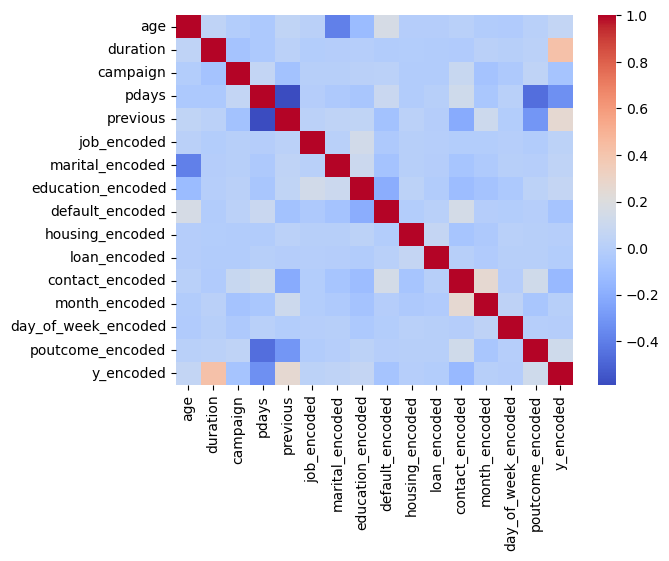

In [26]:
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(df.select_dtypes('int64', 'float64').corr(), 
            cmap=cmap)
plt.savefig('images/feature_correlations.png')
plt.show() 

# Data Analysis

## plotting the value counts for all categorical features

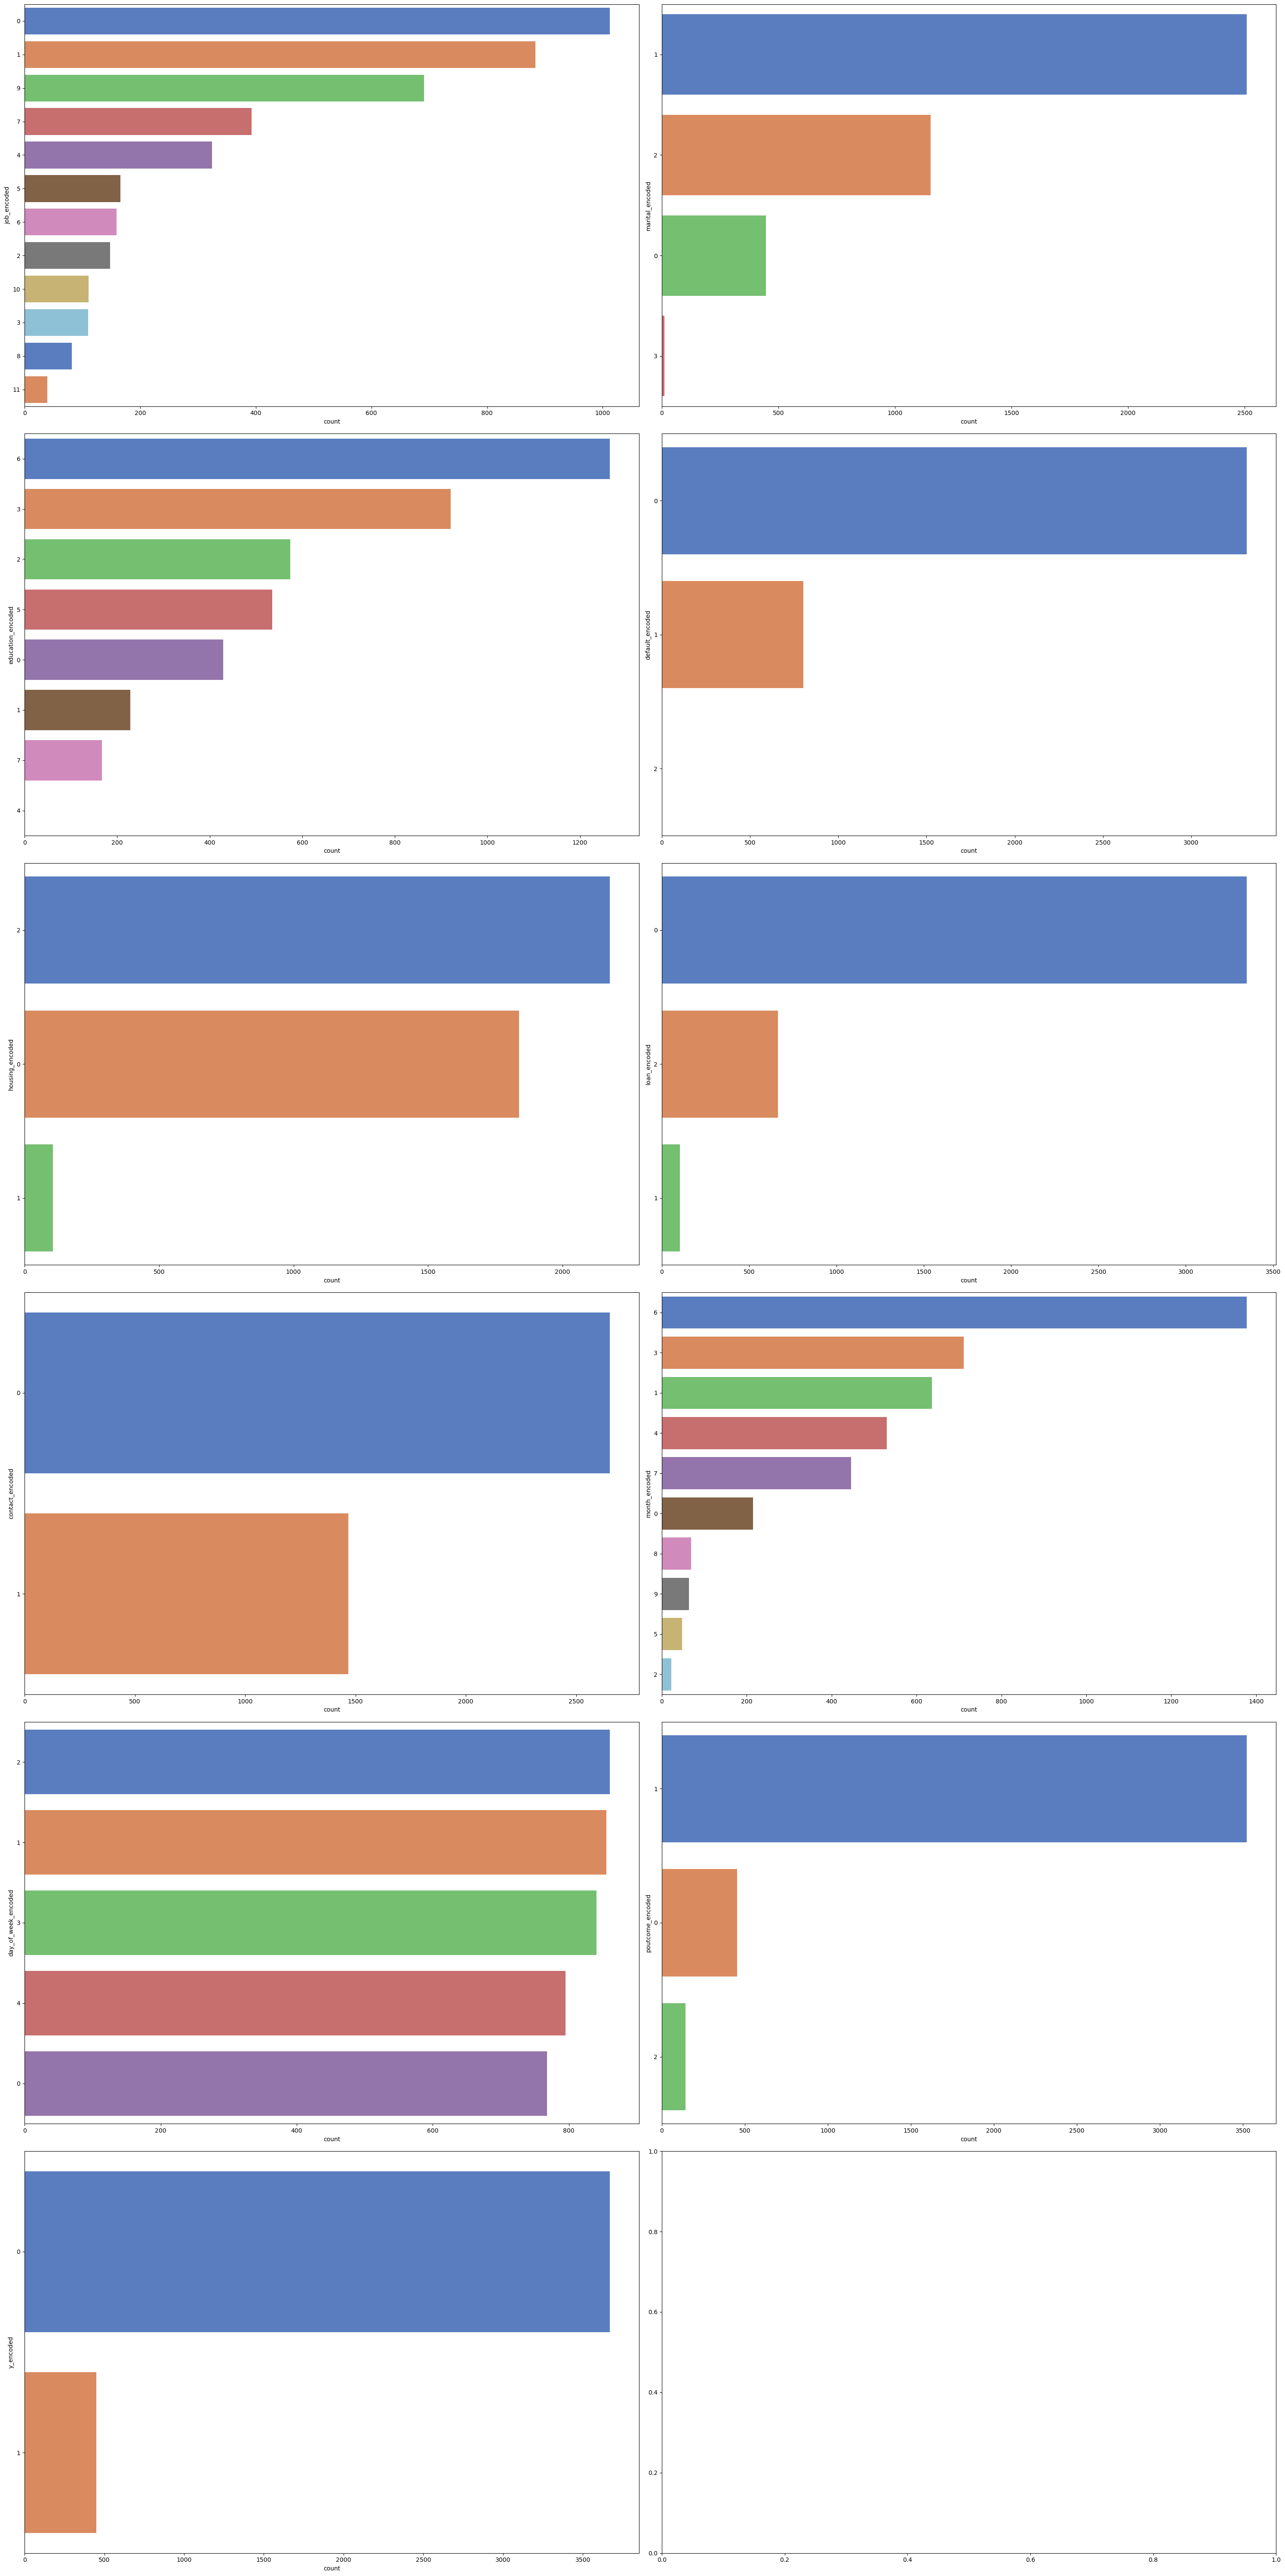

In [27]:
fig, axes = plt.subplots(6, 2, figsize=(30,60))
axes = axes.flatten()

encoded_columns = [col for col in df.columns if col.endswith("_encoded")]

for ax, col in zip(axes, encoded_columns):
    sns.countplot(y=col, 
                  data=df, 
                  ax=ax, 
                  palette="muted", 
                  order=df[col].value_counts().index);

plt.tight_layout()
plt.savefig('images/cat_features_value_counts.png')
plt.show() 

## Histogram of features

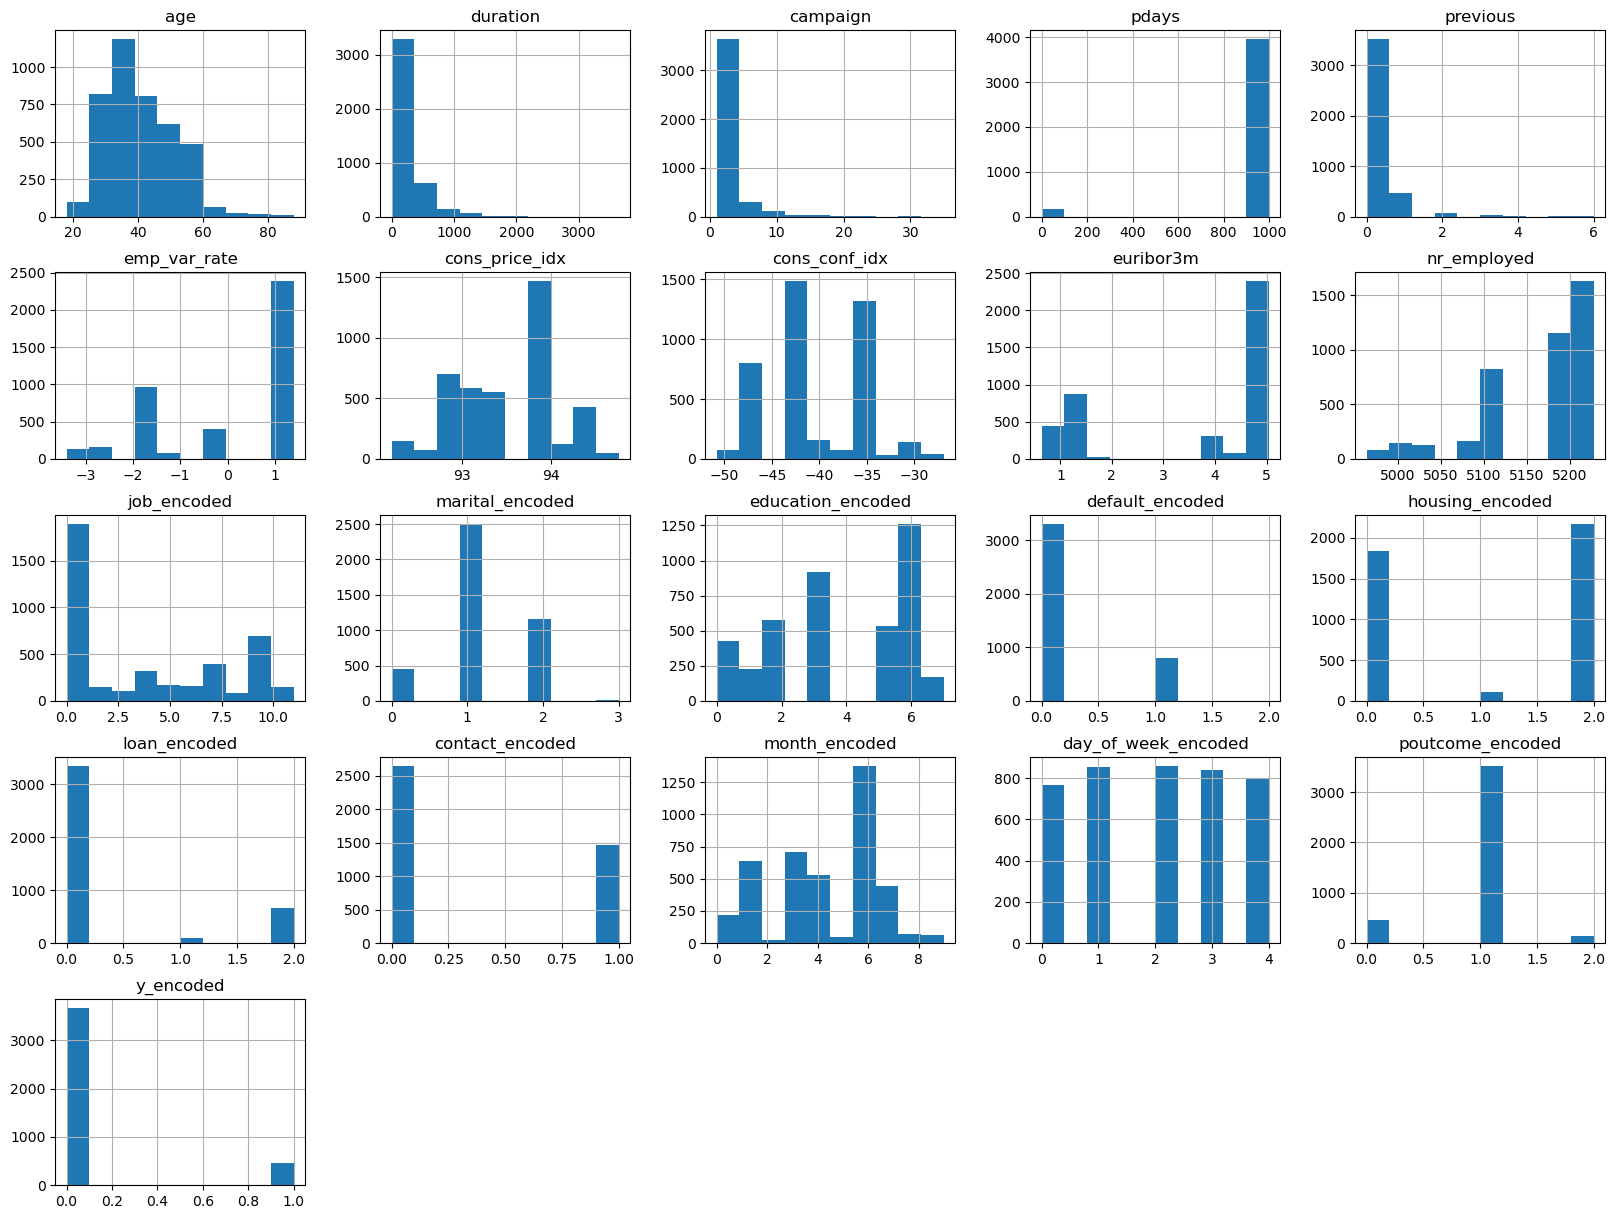

In [28]:
colors = sns.color_palette("Set2", 
                           n_colors=len(df.columns))

df.hist(figsize=(20, 15))
plt.savefig('images/histograms_all_features.png')
plt.show()

In [29]:
df.shape

(4119, 21)

# Model Training

## Data Preprocessing

From our exploratory data analysis, we found that almost all variables are categorical. Some of these can be combined to create a more meaningful new feature. To keep things simple, we will encode the remaining categorical features using OneHotEncoder, as we are primarily using sklearn for model building.

However, one drawback of OneHotEncoding is that it can negatively impact the performance of decision trees and random forests. Despite this, we must use it because RandomForestClassifier in sklearn only supports numerical data.

Considerations for Feature Engineering:
Should we apply dimensionality reduction?
After OneHotEncoding, the total number of features may exceed 50, and some frequency-related columns may be highly correlated. This makes dimensionality reduction techniques like PCA a potential option to simplify the data while preserving important information.

Should we apply feature expansion?
Creating new meaningful features from categorical data manually is challenging. However, we can look at methods like the Kernel SVM, which demonstrates the power of feature expansion. In our case, we predict that the Gaussian RBF kernel will work better than the polynomial kernel. Since most variables are categorical, measuring similarity (as the RBF kernel does) might be more useful than applying polynomial transformations.

In [30]:
X = df.drop(columns=['y_encoded'])
y = df.y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [31]:
num_features = X_train.select_dtypes(['int64', 'float64']).columns
#cat_features = X_train.select_dtypes(['object']).columns

# full_pipeline = ColumnTransformer([('num', StandardScaler(), num_features),
#                                    ('cat', OneHotEncoder(), cat_features)])
full_pipeline = ColumnTransformer([('num', StandardScaler(), num_features)])

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

# Extract new feature names
num_feature_names = num_features  # Numeric columns remain unchanged
# cat_feature_names = full_pipeline.named_transformers_['cat'].get_feature_names_out(cat_features)

# Combine all feature names
#new_feature_names = list(num_feature_names) + list(cat_feature_names)
new_feature_names = list(num_feature_names)

#print numeric features
print(num_feature_names)

#print categorical features 
#print(cat_feature_names)

# Print the new feature names
print(new_feature_names)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'month_encoded', 'day_of_week_encoded', 'poutcome_encoded'],
      dtype='object')
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_encoded', 'marital_encoded', 'education_encoded', 'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded', 'month_encoded', 'day_of_week_encoded', 'poutcome_encoded']


In [32]:
X_train.shape, X_test.shape

((3295, 20), (824, 20))

## Basic Models

In [33]:
# generic helper function to evaluate the different models
# The function evaluate_model(model, X_test, y_test) evaluates the trained models by:
# Predicting the test set labels.
# Printing cross-validation scores and test accuracy.
# Displaying classification reports.
# Visualizing ROC curves and saving them as PNG images.

def evaluate_model(model, X_test=X_test, y_test=y_test):
    y_pred = model.predict(X_test)
    
    print("Cross Validation score of the Estimator: {0:.3f}".format(model.best_score_))
    print("Accuracy on test data: {0:.3f}".format(model.score(X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    print("Model Parameters: {}".format(model.best_params_))
    
    roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    roc_display.line_.set_color("red")  # Change line color
    roc_display.line_.set_linestyle("--")  # Make it dashed
    #plt.title("ROC Curve for Model  {model.__class__.__name__}")
    plt.title(f"ROC Curve for model {model.estimator.__class__.__name__}")
    plt.savefig(f"images/ROC_curve_for_model_{model.estimator.__class__.__name__}.png")
    plt.show()

### Logistic Regression

Cross Validation results: {'fit_time': array([0.6255331, 0.397856 ]), 'score_time': array([0.00025702, 0.00023127]), 'test_score': array([0.89927184, 0.92653309]), 'train_score': array([0.93381906, 0.90291262])}
Cross Validation score of the Estimator: 0.916
Accuracy on test data: 0.911
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       748
           1       0.53      0.39      0.45        76

    accuracy                           0.91       824
   macro avg       0.73      0.68      0.70       824
weighted avg       0.90      0.91      0.91       824

Model Parameters: {'solver': 'newton-cg'}


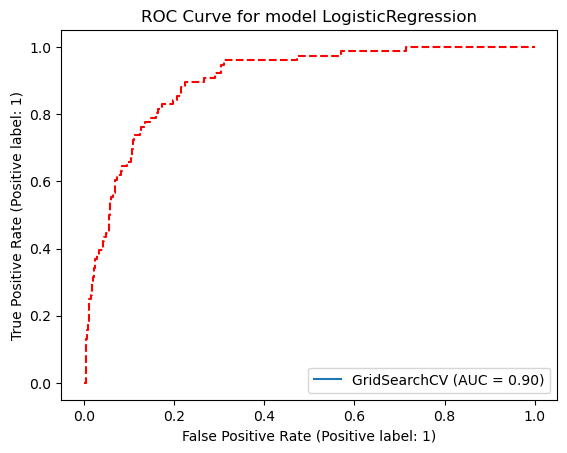

In [41]:
# Lasso Regression: Uses L1 penalty with solvers liblinear and saga.
# Ridge Regression: Uses L2 penalty with solvers newton-cg, lbfgs, sag, and saga.
# Both models tune the regularization parameter C.
# solver: Specifies optimization algorithm for logistic regression.
# setting Maximum iterations to 200 for convergence
# setting random_state to a specific value for reproducibility.
# param_grid is used to tune the hyperparameters in GridSearchCV
    
param_grid = dict(solver=['newton-cg', 'lbfgs', 'sag', 'saga'])

logreg_model = LogisticRegression(max_iter=200,
                                  random_state=0)
logreg_gscv = GridSearchCV(estimator=logreg_model, 
                           param_grid=param_grid)

logreg_gscv.fit(X_train, y_train)

cv_results = cross_validate(logreg_gscv, X_train, y_train, cv=2, scoring='accuracy', return_train_score=True)
print(f"Cross Validation results: {cv_results}")

evaluate_model(logreg_gscv)

#### Lasso

In [ ]:
param_grid = dict(C=[10 ** x for x in range(-1, 2)], 
                 solver=['liblinear', 'saga'])
lasso_model = LogisticRegression(penalty='l1', 
                                 max_iter=200,
                                 random_state=0)

lasso_gscv = GridSearchCV(estimator=lasso_model, 
                          param_grid=param_grid)
lasso_gscv.fit(X_train, y_train)
evaluate_model(lasso_gscv)

#### Ridge

In [ ]:
param_grid = dict(C=[10 ** x for x in range(-1, 2)],
                  solver=['newton-cg', 'lbfgs', 'sag', 'saga'])

ridge_model = LogisticRegression(penalty='l2', 
                                 max_iter=200,
                                 random_state=0)

ridge_gscv = GridSearchCV(estimator=ridge_model, 
                          param_grid=param_grid)

ridge_gscv.fit(X_train, y_train)
evaluate_model(ridge_gscv)

All the logistic regression models have the same accuracy no matter which penalty and which set of parameter are used. Let's switch to other models.

### Decision Tree

In [ ]:
param_grid = dict(criterion=['gini', 'entropy'],
                  min_samples_split=[2, 10],
                  max_depth=[5, 10],
                  min_samples_leaf=[1, 10],
                  max_leaf_nodes=[10, 20])

dt_gscv = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                       param_grid, 
                       scoring='accuracy')

dt_gscv.fit(X_train, y_train)
evaluate_model(dt_gscv)

### Naive Bayes

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
params = {}
gnb_gscv = GridSearchCV(gnb, 
                        params)

gnb_gscv.fit(X_train, y_train)

evaluate_model(gnb_gscv)

#### Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
param_grid = dict(alpha=[0.1, 0.3, 0.9, 1])

bnb_gscv = GridSearchCV(bnb, 
                        param_grid)
bnb_gscv.fit(X_train, y_train)

evaluate_model(bnb_gscv)

### K-nearest Neighbor

Cross Validation results: {'fit_time': array([0.42296863, 0.38433504]), 'score_time': array([0.01901913, 0.02792406]), 'test_score': array([0.89320388, 0.90528233]), 'train_score': array([0.9247116 , 0.89745146])}
Cross Validation score of the Estimator: 0.905
Accuracy on test data: 0.915
              precision    recall  f1-score   support

           0       0.93      0.99      0.95       748
           1       0.61      0.22      0.33        76

    accuracy                           0.92       824
   macro avg       0.77      0.60      0.64       824
weighted avg       0.90      0.92      0.90       824

Model Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}


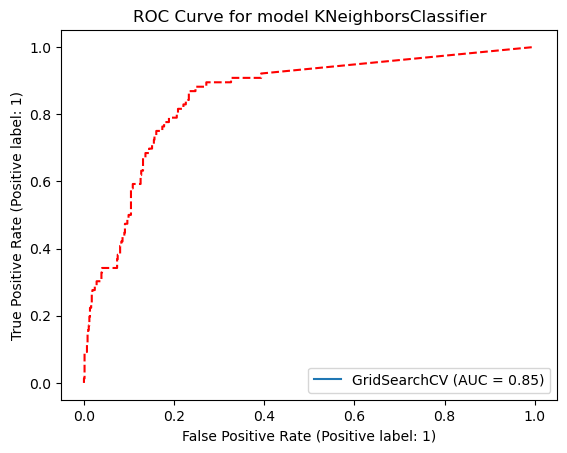

In [43]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
}

knn_gscv = GridSearchCV(knn_clf, 
                        param_grid=param_grid)

knn_gscv.fit(X_train, y_train)
cv_results = cross_validate(knn_gscv, X_train, y_train, cv=2, scoring='accuracy', return_train_score=True)
print(f"Cross Validation results: {cv_results}")

evaluate_model(knn_gscv)

### Linear SVM

Cross Validation results: {'fit_time': array([0.050102  , 0.05886698]), 'score_time': array([0.00082374, 0.00046396]), 'test_score': array([0.90351942, 0.92592593]), 'train_score': array([0.92714026, 0.90048544])}
Cross Validation score of the Estimator: 0.914
Accuracy on test data: 0.917
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       748
           1       0.58      0.37      0.45        76

    accuracy                           0.92       824
   macro avg       0.76      0.67      0.70       824
weighted avg       0.91      0.92      0.91       824

Model Parameters: {'C': 10}


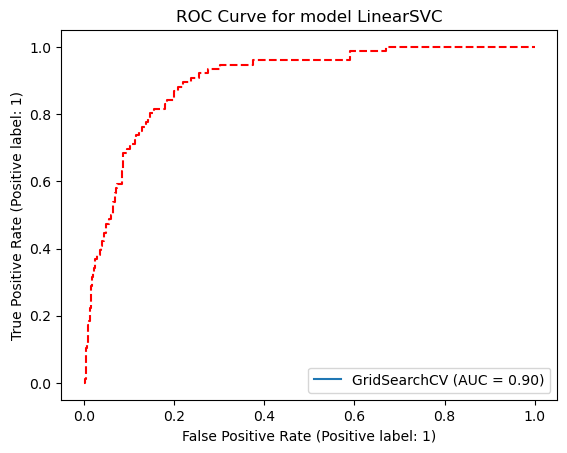

In [42]:
param_grid = dict(C=[0.1, 1, 10, 100])

linear_svc = LinearSVC(max_iter=5000, 
                       dual=False)

linear_svc_gscv = GridSearchCV(estimator=linear_svc, 
                               param_grid=param_grid)

linear_svc_gscv.fit(X_train, y_train)

cv_results = cross_validate(linear_svc_gscv, X_train, y_train, cv=2, scoring='accuracy', return_train_score=True)
print(f"Cross Validation results: {cv_results}")

evaluate_model(linear_svc_gscv)

| Model | Validation Accuracy|Testing Accuracy|AUC|
|-------|---------|-------|-----------|
|Logistic Regression with No Penalty|0.916|0.911|0.90|
|Lasso Logistic Regression|0.917|0.910|0.90|
|Ridge Logistic Regression|0.917|0.911|0.90|
|Decision Tree|0.915|0.905|0.87|
|Gaussian Naive Bayes|0.853|0.840|0.82|
|Bernoulli Naive Bayes|0.830|0.826|0.80|
|KNN Classifier|0.905|0.915|0.85|
|Linear SVM|0.9.14|0.917|0.90|

### PCA - Principal Component Analysis

Finally I explored PCA - Principal Component Analysis, to reduce the dimensions or in other words the number of features. 
Re-trained the basic models after applying PCA, to explore any improvement in performance. 

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape)

for i, component in enumerate(pca.components_):
    top_feature = new_feature_names[np.argmax(abs(component))]
    print(f"PC{i+1} is most influenced by: {top_feature} with influence ration {pca.explained_variance_ratio_[i]}")

### Logistic Regression on dataset with PCA 

In [ ]:
param_grid = dict(solver=['newton-cg', 'lbfgs', 'sag', 'saga'])

logreg_model = LogisticRegression(max_iter=200,
                                  random_state=0)

logreg_pca_gscv = GridSearchCV(estimator=logreg_model, 
                               param_grid=param_grid)

logreg_pca_gscv.fit(X_train_pca, y_train)
print(f"ROC_curve_for_model_{logreg_pca_gscv.estimator.__class__.__name__}")
evaluate_model(logreg_pca_gscv,X_test_pca, y_test)

### Lasso Regression on dataset with PCA 

In [ ]:
param_grid = dict(C=[10 ** x for x in range(-1, 2)], 
                 solver=['liblinear', 'saga'])
lasso_model = LogisticRegression(penalty='l1', 
                                 max_iter=200,
                                 random_state=0)

lasso_pca_gscv = GridSearchCV(estimator=lasso_model, 
                              param_grid=param_grid)

lasso_pca_gscv.fit(X_train_pca, y_train)
evaluate_model(lasso_pca_gscv, X_test_pca, y_test)

### Ridge Regression on dataset with PCA 

In [ ]:
param_grid = dict(C=[10 ** x for x in range(-1, 2)],
                  solver=['newton-cg', 'lbfgs', 'sag', 'saga'])

ridge_model = LogisticRegression(penalty='l2', 
                                 max_iter=200,
                                 random_state=0)

ridge_pca_gscv = GridSearchCV(estimator=ridge_model, 
                              param_grid=param_grid)

ridge_pca_gscv.fit(X_train_pca, y_train)
print(f"ROC_curve_for_model_{ridge_pca_gscv.estimator.__class__.__name__}")
evaluate_model(ridge_pca_gscv, X_test_pca, y_test)

### DecisionTrees on dataset with PCA 

In [ ]:
param_grid = dict(criterion=['gini', 'entropy'],
                  min_samples_split=[2, 10],
                  max_depth=[5, 10],
                  min_samples_leaf=[1, 10],
                  max_leaf_nodes=[10, 20])

dt_pca_gscv = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                           param_grid, 
                           scoring='accuracy')

dt_pca_gscv.fit(X_train_pca, y_train)
evaluate_model(dt_pca_gscv, X_test_pca, y_test)

### Bernoulli Naive Bayes on dataset with PCA 

In [ ]:
bnb = BernoulliNB()

param_grid = dict(alpha=[0.1, 0.3, 0.9, 1])

bnb_pca_gscv = GridSearchCV(bnb, 
                            param_grid)

bnb_pca_gscv.fit(X_train_pca, y_train)

evaluate_model(bnb_pca_gscv, X_test_pca, y_test)

### KNN - K-Nearest-Neighbors on dataset with PCA 

In [ ]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
}

knn_pca_gscv = GridSearchCV(knn_clf, 
                            param_grid=param_grid)

knn_pca_gscv.fit(X_train_pca, y_train)

evaluate_model(knn_pca_gscv, X_test_pca, y_test)

### Linear SVM on dataset with PCA 

In [ ]:
param_grid = dict(C=[0.1, 1, 10, 100])

linear_svc = LinearSVC(max_iter=5000, 
                       dual=False)

linear_svc_pca_gscv = GridSearchCV(estimator=linear_svc, 
                                   param_grid=param_grid)

linear_svc_pca_gscv.fit(X_train_pca, y_train)

evaluate_model(linear_svc_pca_gscv, X_test_pca, y_test)

| Models with out PCA | Validation Accuracy|Testing Accuracy|AUC|
|-------|---------|-------|-----------|
|**Logistic Regression with No Penalty**|**0.916**|**0.911**|**0.90**|
|**Lasso Logistic Regression**|**0.917**|**0.910**|**0.90**|
|**Ridge Logistic Regression**|**0.917**|**0.911**|**0.90**|
|Decision Tree|0.915|0.905|0.87|
|Gaussian Naive Bayes|0.853|0.840|0.82|
|Bernoulli Naive Bayes|0.830|0.826|0.80|
|KNN Classifier|0.905|0.915|0.85|
|**Linear SVM**|**0.914**|**0.917**|**0.90**|

| Models with PCA | Validation Accuracy|Testing Accuracy|AUC|
|-------|---------|-------|-----------|
|**Logistic Regression with No Penalty**|**0.911**|**0.911**|**0.90**|
|**Lasso Logistic Regression**|**0.912**|**0.911**|**0.90**|
|**Ridge Logistic Regression**|**0.912**|**0.911**|**0.90**|
|Decision Tree|0.903|0.905|0.84|
|Bernoulli Naive Bayes|0.890|0.908|0.87|
|KNN Classifier|0.902|0.911|0.85|
|**Linear SVM**|**0.910**|**0.915**|**0.90**|

